## Job Posting Characteristics

#### Description Length and Applications: Analyze if there's a correlation between the length of job descriptions and the number of applications received. Are shorter or longer descriptions more effective?
#### Work Type Preferences: Examine the preferences for full-time, part-time, and remote positions. What is the distribution of job types in the current market?

In [1]:
import pandas as pd

# Load the datasets
postings = pd.read_csv('updated_data\postings.csv')
companies = pd.read_csv('updated_data\company.csv')
company_industries = pd.read_csv('updated_data\company_industries.csv')
company_specialities = pd.read_csv('updated_data\company_specialities.csv')
employee_counts = pd.read_csv('updated_data\employee_counts.csv')
salaries = pd.read_csv('updated_data\salaries.csv')
job_skills = pd.read_csv('updated_data\Job_skills.csv')
job_industries = pd.read_csv('updated_data\modified_job_industries.csv')


In [2]:
postings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35564 entries, 0 to 35563
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   job_id                35564 non-null  int64  
 1   company_name          35564 non-null  object 
 2   title                 35564 non-null  object 
 3   description           35564 non-null  object 
 4   pay_period            35564 non-null  object 
 5   location              35564 non-null  object 
 6   company_id            35564 non-null  int64  
 7   views                 35564 non-null  int64  
 8   formatted_work_type   35564 non-null  object 
 9   applies               35564 non-null  int64  
 10  original_listed_time  35564 non-null  object 
 11  remote_allowed        35564 non-null  bool   
 12  job_posting_url       35564 non-null  object 
 13  expiry                35564 non-null  object 
 14  listed_time           35564 non-null  object 
 15  work_type          

In [4]:
# Step 1: Calculate the length of each job description
postings['description_length'] = postings['description'].apply(len)

In [5]:
# Step 2: Calculate the correlation between description length and applications received
correlation = postings['description_length'].corr(postings['applies'])
correlation

np.float64(-0.04316987256478171)

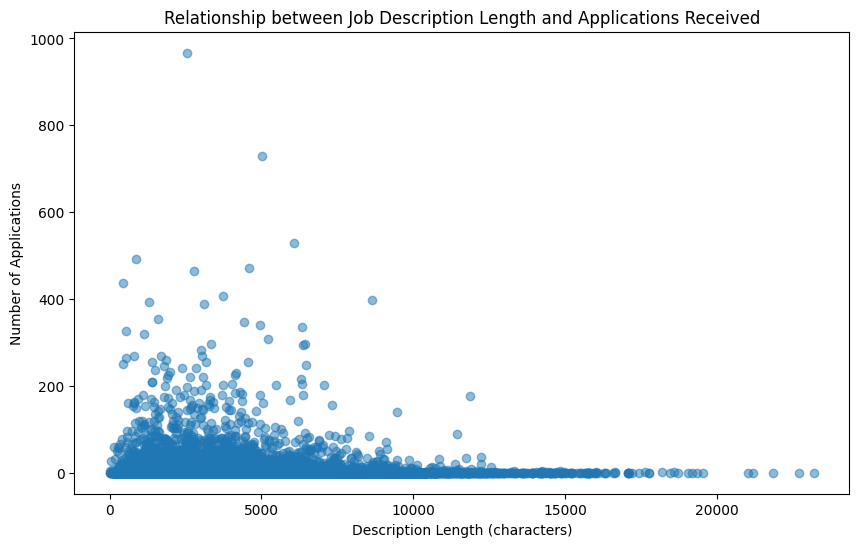

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(postings['description_length'], postings['applies'], alpha=0.5)
plt.title("Relationship between Job Description Length and Applications Received")
plt.xlabel("Description Length (characters)")
plt.ylabel("Number of Applications")
plt.show()

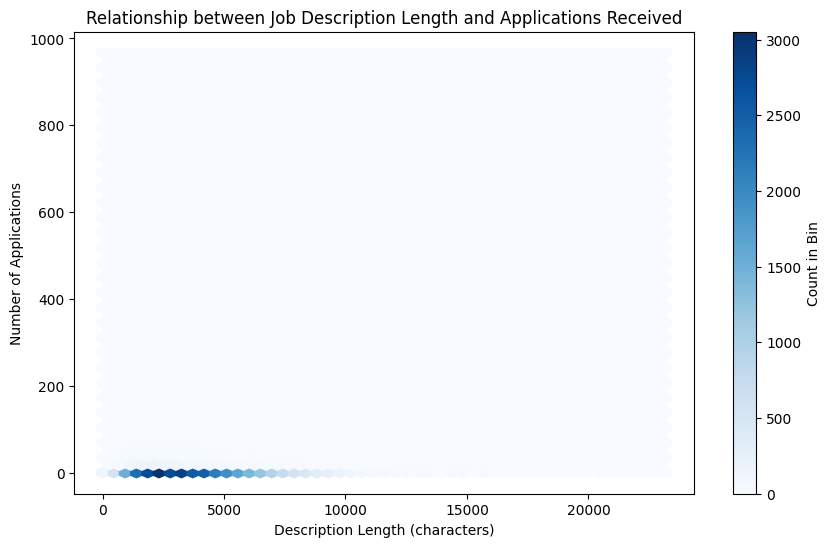

In [8]:
plt.figure(figsize=(10, 6))
plt.hexbin(postings['description_length'], postings['applies'], gridsize=50, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title("Relationship between Job Description Length and Applications Received")
plt.xlabel("Description Length (characters)")
plt.ylabel("Number of Applications")
plt.show()


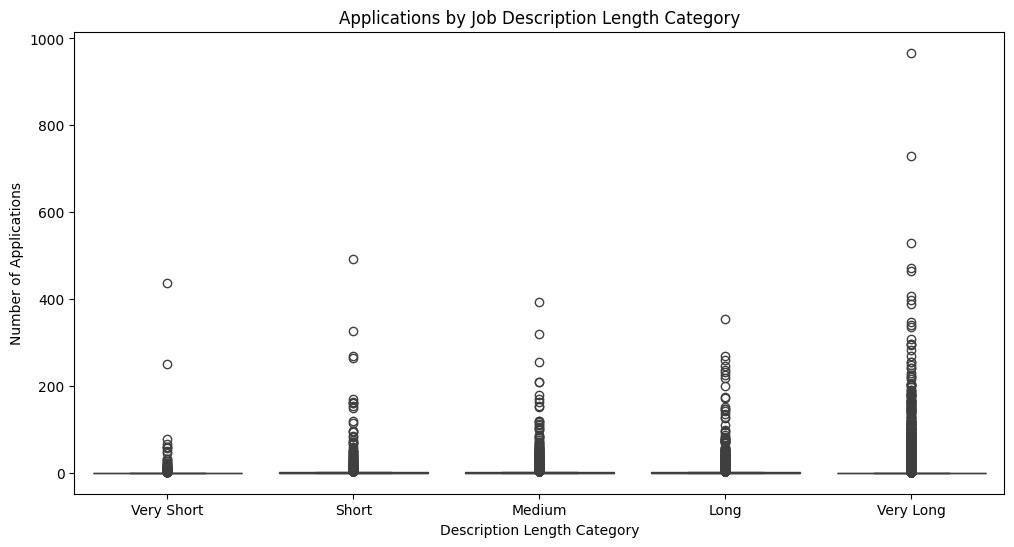

In [10]:
# Categorize description lengths
bins = [0, 500, 1000, 1500, 2000, postings['description_length'].max()]
labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
postings['length_category'] = pd.cut(postings['description_length'], bins=bins, labels=labels)

plt.figure(figsize=(12, 6))
sns.boxplot(x='length_category', y='applies', data=postings)
plt.title("Applications by Job Description Length Category")
plt.xlabel("Description Length Category")
plt.ylabel("Number of Applications")
plt.show()


In [13]:
job_type_counts = postings['work_type'].value_counts()
job_type_counts

work_type
FULL_TIME     28751
CONTRACT       3806
PART_TIME      2233
TEMPORARY       389
INTERNSHIP      244
OTHER           133
VOLUNTEER         8
Name: count, dtype: int64

C:\Users\My Account\AppData\Local\Temp\ipykernel_9748\504269325.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




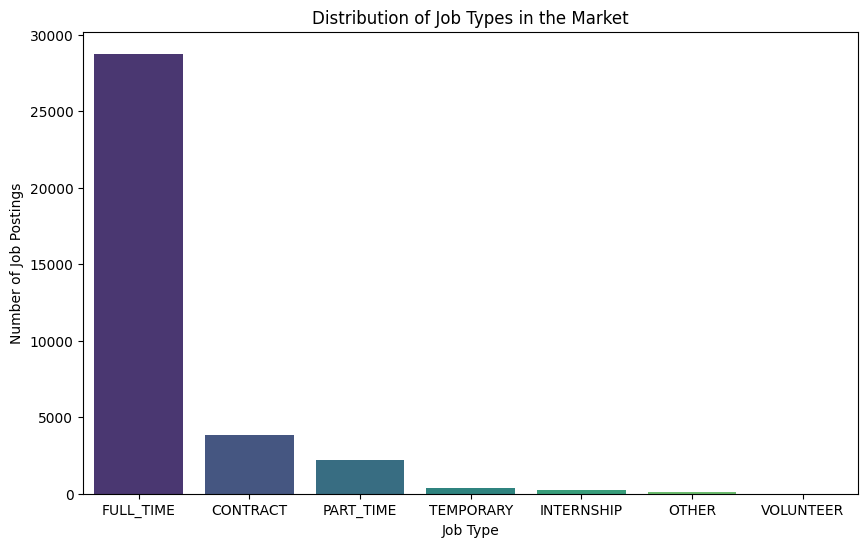

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(x=job_type_counts.index, y=job_type_counts.values, palette="viridis")
plt.title("Distribution of Job Types in the Market")
plt.xlabel("Job Type")
plt.ylabel("Number of Job Postings")
plt.show()